<a href="https://colab.research.google.com/github/aditipriya25/ISRO/blob/main/NeRF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [8]:
class NeRF(nn.Module):
    def __init__(self, D=8, W=256):
        super(NeRF, self).__init__()
        self.D = D
        self.W = W
        self.layers = nn.ModuleList([nn.Linear(3, W)] +
                                    [nn.Linear(W, W) if i != 4 else nn.Linear(W + 3, W) for i in range(D - 1)])
        self.fc_alpha = nn.Linear(W, 1)
        self.fc_rgb = nn.Linear(W, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        h = x
        for i, layer in enumerate(self.layers):
            h = self.relu(layer(h))
            if i == 4:
                h = torch.cat([h, x], -1)
        alpha = self.fc_alpha(h)
        rgb = self.fc_rgb(h)
        return torch.cat([rgb, alpha], -1)


In [9]:
# Assume you have rays_o, rays_d, and target_srgb for training
# rays_o: [N, 3] ray origins
# rays_d: [N, 3] ray directions
# target_srgb: [N, 3] ground truth RGB values

rays_o = ...  # Load or generate ray origins
rays_d = ...  # Load or generate ray directions
target_srgb = ...  # Load target RGB values


In [20]:
from google.colab import files

# Upload the .img file
uploaded = files.upload()


Saving M104318871LC_pyr.tif to M104318871LC_pyr (1).tif


In [21]:
# Install Miniconda
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

# Initialize Conda
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!conda init bash

# Install ISIS3
!conda install -c usgs-astrogeology isis3 -y


--2024-06-25 05:48:33--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directories of packages that are compatible with the Python interpreter
    in Miniconda3: /usr/local
no change     /usr/local/condabin/conda
no change     /usr/local/bi

In [22]:
import os
img_file_path = '/content/M104318871LC_pyr.tif'
cub_file_path = 'output_image.cub'

# Convert the .img file to .cub using ISIS3

!m68k2isis from={img_file_path} to={cub_file_path}


/bin/bash: line 1: m68k2isis: command not found


In [35]:
import torch.nn as nn

# ... (rest of your code)

def generate_rays(camera, image_shape):
    # Placeholder function for generating rays
    # Normally, this should be derived from actual camera parameters
    H, W = image_shape[:2]
    camera = {
        'position': [0, 0, 0],
        'orientation': [0, 0, 0],

    }
    rays_o = np.random.rand(H, W, 3)
    rays_d = np.random.rand(H, W, 3)

    return rays_o, rays_d

image_data = np.random.rand(100, 100, 3)
rays_o, rays_d = generate_rays(None, image_data.shape)

# Convert to PyTorch tensors - removing .cuda() calls
rays_o = torch.tensor(rays_o, dtype=torch.float32)
rays_d = torch.tensor(rays_d, dtype=torch.float32)
target_srgb = torch.tensor(image_data, dtype=torch.float32)

print("Data preparation completed")

Data preparation completed


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeRF(nn.Module):
    def __init__(self, D=8, W=256):
        super(NeRF, self).__init__()
        self.D = D
        self.W = W
        self.layers = nn.ModuleList([nn.Linear(3, W)] +
                                    [nn.Linear(W, W) if i != 4 else nn.Linear(W + 3, W) for i in range(D - 1)])
        self.fc_alpha = nn.Linear(W, 1)
        self.fc_rgb = nn.Linear(W, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        h = x
        for i, layer in enumerate(self.layers):
            h = self.relu(layer(h))
            if i == 4:
                h = torch.cat([h, x], -1)
        alpha = self.fc_alpha(h)
        rgb = self.fc_rgb(h)
        return torch.cat([rgb, alpha], -1)

# Training loop (simplified)
model = NeRF()
optimizer = optim.Adam(model.parameters(), lr=5e-4)
criterion = nn.MSELoss()

# Generate or load ray origins and directions
# Example (replace with your actual data loading/generation)
H, W = 128, 128  # Example image dimensions
rays_o = torch.rand(H, W, 3)
rays_d = torch.rand(H, W, 3)
target_srgb = torch.rand(H, W, 3)

for epoch in range(10000):
    t_vals = torch.linspace(0, 1, steps=64)
    points = rays_o.unsqueeze(2) + rays_d.unsqueeze(2) * t_vals.unsqueeze(0).unsqueeze(0).unsqueeze(3)
    points = points.view(-1, 3)

    rgb_alpha = model(points)
    rgb = rgb_alpha[:, :3]
    rgb = rgb.view(target_srgb.shape[0], target_srgb.shape[1], 64, 3).mean(dim=2)

    loss = criterion(rgb, target_srgb)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.320112019777298


In [1]:
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from pathlib import Path

In [7]:
# Install required packages
!pip install imagecodecs
!pip install tifffile

# Import necessary libraries
import numpy as np
import torch
import tifffile
import matplotlib.pyplot as plt

# Ensure imagecodecs is properly imported
import imagecodecs

try:
    # Load .tif image file using tifffile
    data = tifffile.imread("/content/M104318871LC_pyr.tif")

    # Assuming the data contains images, poses, and focal information
    # If the structure of the data is different, adjust accordingly
    imgs, poses, focal = data["images"], data["poses"], data["focal"]

    # Get image dimensions
    _, H, W, _ = imgs.shape

    # Prepare test image and pose for visualization
    test_img = torch.tensor(imgs[101])
    test_pose = torch.tensor(poses[101])

    # Remove the test image and pose from the dataset
    imgs = np.delete(imgs, 101, axis=0)
    poses = np.delete(poses, 101, axis=0)

    # Print image dimensions
    print(f"H={H}, W={W}")

    # Visualize the test image
    plt.imshow(test_img.numpy())
    plt.show()
except ValueError as e:
    print(f"Error reading the TIFF file: {e}")


Error reading the TIFF file: <COMPRESSION.JPEG: 7> requires the 'imagecodecs' package


In [21]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    %tensorflow_version 2.x

import os, sys
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [22]:
if not os.path.exists('tiny_nerf_data.npz'):
    !wget http://cseweb.ucsd.edu/~viscomp/projects/LF/papers/ECCV20/nerf/tiny_nerf_data.npz

--2024-06-25 15:32:49--  http://cseweb.ucsd.edu/~viscomp/projects/LF/papers/ECCV20/nerf/tiny_nerf_data.npz
Resolving cseweb.ucsd.edu (cseweb.ucsd.edu)... 132.239.8.30
Connecting to cseweb.ucsd.edu (cseweb.ucsd.edu)|132.239.8.30|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cseweb.ucsd.edu//~viscomp/projects/LF/papers/ECCV20/nerf/tiny_nerf_data.npz [following]
--2024-06-25 15:32:49--  https://cseweb.ucsd.edu//~viscomp/projects/LF/papers/ECCV20/nerf/tiny_nerf_data.npz
Connecting to cseweb.ucsd.edu (cseweb.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12727482 (12M)
Saving to: ‘tiny_nerf_data.npz’

tiny_nerf_data.npz  100%[===================>]  12.14M  36.5MB/s    in 0.3s    

2024-06-25 15:32:50 (36.5 MB/s) - ‘tiny_nerf_data.npz’ saved [12727482/12727482]



(106, 100, 100, 3) (106, 4, 4) 138.88887889922103


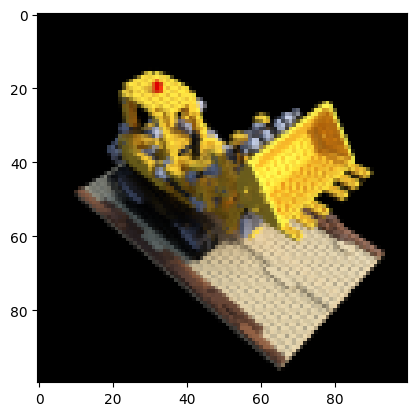

In [23]:
data = np.load('tiny_nerf_data.npz')
images = data['images']
poses = data['poses']
focal = data['focal']
H, W = images.shape[1:3]
print(images.shape, poses.shape, focal)

testimg, testpose = images[101], poses[101]
images = images[:100,...,:3]
poses = poses[:100]

plt.imshow(testimg)
plt.show()

In [24]:
def posenc(x):
  rets = [x]
  for i in range(L_embed):
    for fn in [tf.sin, tf.cos]:
      rets.append(fn(2.**i * x))
  return tf.concat(rets, -1)

L_embed = 6
embed_fn = posenc
# L_embed = 0
# embed_fn = tf.identity

def init_model(D=8, W=256):
    relu = tf.keras.layers.ReLU()
    dense = lambda W=W, act=relu : tf.keras.layers.Dense(W, activation=act)

    inputs = tf.keras.Input(shape=(3 + 3*2*L_embed))
    outputs = inputs
    for i in range(D):
        outputs = dense()(outputs)
        if i%4==0 and i>0:
            outputs = tf.concat([outputs, inputs], -1)
    outputs = dense(4, act=None)(outputs)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


def get_rays(H, W, focal, c2w):
    i, j = tf.meshgrid(tf.range(W, dtype=tf.float32), tf.range(H, dtype=tf.float32), indexing='xy')
    dirs = tf.stack([(i-W*.5)/focal, -(j-H*.5)/focal, -tf.ones_like(i)], -1)
    rays_d = tf.reduce_sum(dirs[..., np.newaxis, :] * c2w[:3,:3], -1)
    rays_o = tf.broadcast_to(c2w[:3,-1], tf.shape(rays_d))
    return rays_o, rays_d



def render_rays(network_fn, rays_o, rays_d, near, far, N_samples, rand=False):

    def batchify(fn, chunk=1024*32):
        return lambda inputs : tf.concat([fn(inputs[i:i+chunk]) for i in range(0, inputs.shape[0], chunk)], 0)

    # Compute 3D query points
    z_vals = tf.linspace(near, far, N_samples)
    if rand:
      z_vals += tf.random.uniform(list(rays_o.shape[:-1]) + [N_samples]) * (far-near)/N_samples
    pts = rays_o[...,None,:] + rays_d[...,None,:] * z_vals[...,:,None]

    # Run network
    pts_flat = tf.reshape(pts, [-1,3])
    pts_flat = embed_fn(pts_flat)
    raw = batchify(network_fn)(pts_flat)
    raw = tf.reshape(raw, list(pts.shape[:-1]) + [4])

    # Compute opacities and colors
    sigma_a = tf.nn.relu(raw[...,3])
    rgb = tf.math.sigmoid(raw[...,:3])

    # Do volume rendering
    dists = tf.concat([z_vals[..., 1:] - z_vals[..., :-1], tf.broadcast_to([1e10], z_vals[...,:1].shape)], -1)
    alpha = 1.-tf.exp(-sigma_a * dists)
    weights = alpha * tf.math.cumprod(1.-alpha + 1e-10, -1, exclusive=True)

    rgb_map = tf.reduce_sum(weights[...,None] * rgb, -2)
    depth_map = tf.reduce_sum(weights * z_vals, -1)
    acc_map = tf.reduce_sum(weights, -1)

    return rgb_map, depth_map, acc_map

0 2.287648916244507 secs per iter


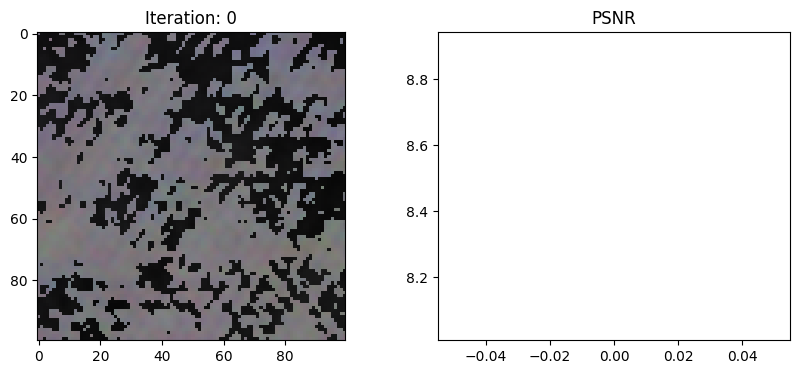

In [ ]:
model = init_model()
optimizer = tf.keras.optimizers.Adam(5e-4)

N_samples = 64
N_iters = 1000
psnrs = []
iternums = []
i_plot = 25

import time
t = time.time()
for i in range(N_iters+1):

    img_i = np.random.randint(images.shape[0])
    target = images[img_i]
    pose = poses[img_i]
    rays_o, rays_d = get_rays(H, W, focal, pose)
    with tf.GradientTape() as tape:
        rgb, depth, acc = render_rays(model, rays_o, rays_d, near=2., far=6., N_samples=N_samples, rand=True)
        loss = tf.reduce_mean(tf.square(rgb - target))
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if i%i_plot==0:
        print(i, (time.time() - t) / i_plot, 'secs per iter')
        t = time.time()

        # Render the holdout view for logging
        rays_o, rays_d = get_rays(H, W, focal, testpose)
        rgb, depth, acc = render_rays(model, rays_o, rays_d, near=2., far=6., N_samples=N_samples)
        loss = tf.reduce_mean(tf.square(rgb - testimg))
        psnr = -10. * tf.math.log(loss) / tf.math.log(10.)

        psnrs.append(psnr.numpy())
        iternums.append(i)

        plt.figure(figsize=(10,4))
        plt.subplot(121)
        plt.imshow(rgb)
        plt.title(f'Iteration: {i}')
        plt.subplot(122)
        plt.plot(iternums, psnrs)
        plt.title('PSNR')
        plt.show()

print('Done')